# Proyek Klasifikasi Kanker Payudara

## Pendahuluan
Proyek ini bertujuan untuk membangun model machine learning yang dapat mengklasifikasikan tumor payudara sebagai **malignant** (kanker) atau **benign** (non-kanker) berdasarkan fitur-fitur yang diukur dari dataset Breast Cancer Wisconsin. Dataset ini berisi pengukuran karakteristik tumor seperti radius, tekstur, dan lainnya.

**Tujuan:**
- Membangun model klasifikasi dengan akurasi tinggi.
- Membandingkan performa beberapa algoritma (Logistic Regression, Random Forest, SVM) dengan metode seleksi fitur (SelectKBest, RFE).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
# keeps the plots in one place. calls image as static pngs
%matplotlib inline
import matplotlib.gridspec as gridspec # subplots
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE

In [2]:
from google.colab import files
files.upload()  # upload kaggle.json kamu

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
# Download kaggle dataset and unzip the file
# !cp kaggle.json ~/.kaggle/

# !chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data
!unzip breast-cancer-wisconsin-data.zip

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
Archive:  breast-cancer-wisconsin-data.zip
  inflating: data.csv                


# Data Understanding

## Data Loading

In [4]:
df = pd.read_csv("/content/data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


**Insight:**

*   Dataset memiliki 569 baris (pengamatan) dan 33 kolom (fitur + target).
*   Kolom diagnosis adalah target dengan nilai M (malignant) dan B (benign).
*   Kolom id tidak relevan untuk modeling, dan kolom Unnamed: 32 berisi nilai kosong.






## Exploratory Data Analysis

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Insight:**
- Tidak ada missing value pada fitur utama, kecuali kolom Unnamed: 32 yang sepenuhnya kosong.

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


**Insight:**
- Kode ini untuk melihat statistik deskriptif dari dataset Breast Cancer

**Insight:**
- Unnamed: 32 memiliki 562 nilai kosong dan harus dilakukan tindakan

### Data Preprocessing

### Menangani Missing Value

In [8]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [9]:
df.drop('id',axis=1, inplace=True)
df.drop('Unnamed: 32',axis=1, inplace=True)

**Insight:**
- Melakukan tindakan drop untuk kolom yang tidak relevan seperti Id dan data yang kosong (Unnamed: 32)

### Prepare data target

In [10]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

**Insight:**
- Data target memiliki 2 nilai yaitu 'M': malignant, 'B': benign

In [11]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Insight:**
- Mengubah data target menjadi numerik yaitu 1 untuk malignant(M) atau kanker ganas dan 0 Benign(B) atau kanker jinak

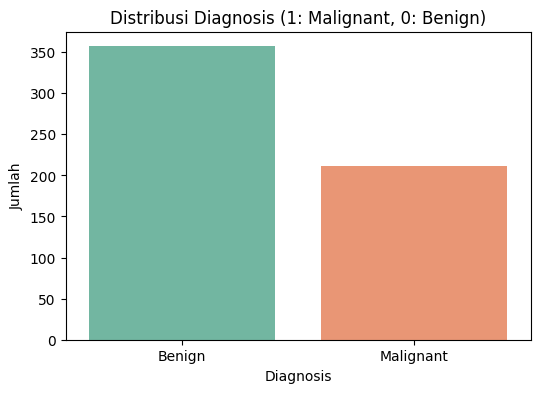

In [12]:
# Plot distribusi target
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df, palette='Set2')
plt.title('Distribusi Diagnosis (1: Malignant, 0: Benign)')
plt.xlabel('Diagnosis')
plt.ylabel('Jumlah')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.show()

In [13]:
print(df['diagnosis'].value_counts())

diagnosis
0    357
1    212
Name: count, dtype: int64


**Insight:**

- B memiliki data 357 dan M memiliki 212

- Distribusi target menunjukkan lebih banyak kasus benign (63%) dibandingkan malignant (37%), tetapi tidak terlalu imbalanced

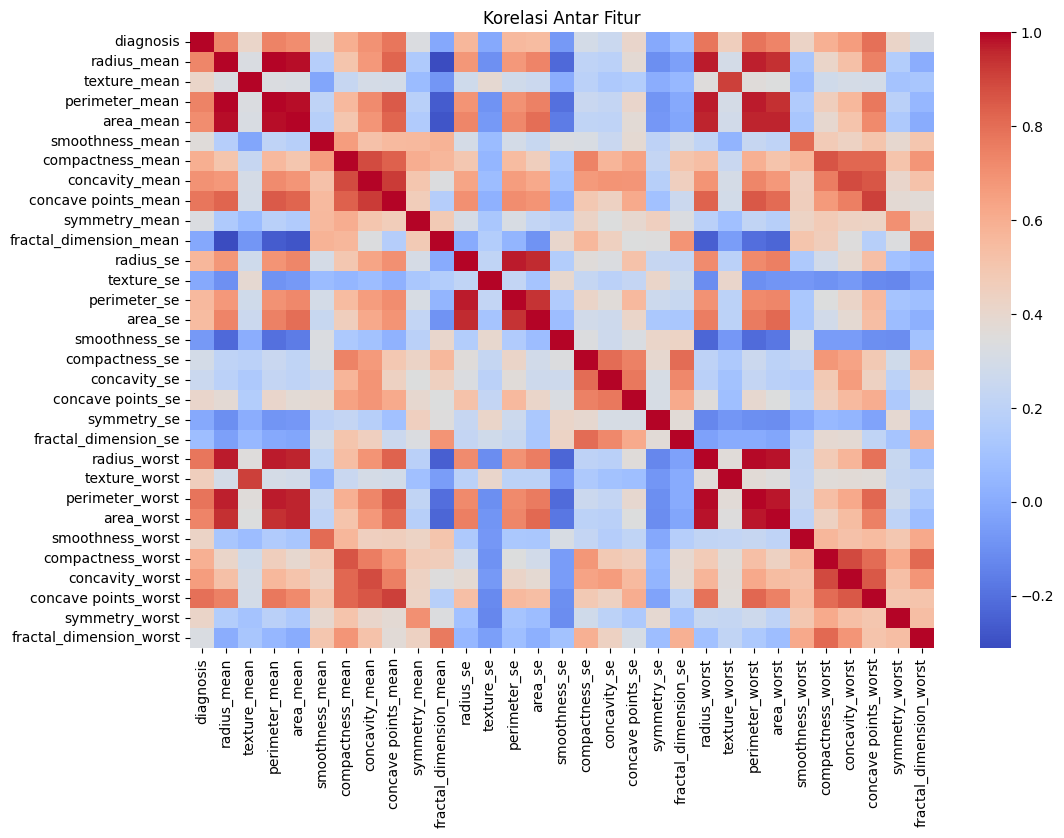

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
# Simpan gambar ke file PNG
plt.savefig('heatmap_korelasi.png', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
# Korelasi antar fitur (heatmap)
corr = df.corr()

# Menghitung korelasi antara fitur dan target
correlation_with_target = df.corr()['diagnosis'].abs().sort_values(ascending=False)

# Menampilkan korelasi
print(correlation_with_target)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0

**Insight:**

- Fitur seperti concave points_worst, perimeter_worst, dan radius_worst memiliki korelasi tinggi dengan target (diagnosis).
- Beberapa fitur memiliki korelasi rendah (< 0.1), yang mungkin tidak terlalu informatif untuk model.

# Data Preparation



In [16]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

**Insight:**
- Memisahkan fitur dan target

In [17]:
# Membagi data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

**Insight:**
- Pembagian data train-test untuk memastikan model dievaluasi pada data yang belum pernah dilihat.
- Data dibagi dengan rasio 80:20 (train:test), dengan stratify untuk menjaga proporsi kelas.

In [18]:
# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Insight:**
- Standarisasi mengubah fitur ke skala yang sama (mean=0, std=1).
- Standarisasi diperlukan karena beberapa algoritma (seperti SVM) sensitif terhadap skala fitur.


# Feature Selection

### SelectKBest

In [19]:
# ----------------------------------------
# Feature Selection dengan SelectKBest
# ----------------------------------------
k = 10  # Jumlah fitur yang diambil
skb = SelectKBest(score_func=f_classif, k=k)
X_train_skb = skb.fit_transform(X_train_scaled, y_train)
X_test_skb = skb.transform(X_test_scaled)

skb_features = X.columns[skb.get_support()]
print("Fitur dari SelectKBest:", skb_features.tolist())

Fitur dari SelectKBest: ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst']


**Insight:**
- Menggunakan SelectKBest untuk memilih 10 fitur terbaik berdasarkan skor ANOVA F-value.

- Fitur terpilih mencakup'radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst', yang konsisten dengan korelasi tinggi terhadap target.

### RFE

**Insight**
- Menggunakan RFE dengan tiga algoritma: Logistic Regression, Random Forest, dan SVM.

### Logistic Regression

In [20]:
# ----------------------------------------
# Feature Selection dengan RFE
# ----------------------------------------
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=k)
rfe.fit(X_train_scaled, y_train)

X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)

rfe_features = X.columns[rfe.support_]
print("Fitur dari RFE LR:", rfe_features.tolist())

Fitur dari RFE LR: ['concave points_mean', 'radius_se', 'area_se', 'compactness_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst']


**Insight:**
- Fitur terpilih mencakup 'concave points_mean', 'radius_se', 'area_se', 'compactness_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst', yang konsisten dengan korelasi tinggi terhadap target.

### Random Forest

In [21]:
# Jumlah fitur yang ingin dipilih
k = 10

# Inisialisasi RFE dengan Random Forest
rfe_rf = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=k)
rfe_rf.fit(X_train_scaled, y_train)

# Transformasi data
X_train_rfe_rf = rfe_rf.transform(X_train_scaled)
X_test_rfe_rf = rfe_rf.transform(X_test_scaled)

# Menampilkan nama fitur
rfe_features_rf = X.columns[rfe_rf.support_]
print("Fitur dari RFE (Random Forest):", rfe_features_rf.tolist())

Fitur dari RFE (Random Forest): ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']


**Insight:**
- Fitur terpilih mencakup 'radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst', yang konsisten dengan korelasi tinggi terhadap target.

### SVM

In [22]:
# Inisialisasi RFE dengan SVM (gunakan linear kernel agar bisa menghitung ranking)
rfe_svm = RFE(estimator=SVC(kernel="linear", random_state=42), n_features_to_select=k)
rfe_svm.fit(X_train_scaled, y_train)

# Transformasi data
X_train_rfe_svm = rfe_svm.transform(X_train_scaled)
X_test_rfe_svm = rfe_svm.transform(X_test_scaled)

# Menampilkan nama fitur
rfe_features_svm = X.columns[rfe_svm.support_]
print("Fitur dari RFE (SVM):", rfe_features_svm.tolist())


Fitur dari RFE (SVM): ['concavity_mean', 'concave points_mean', 'radius_se', 'texture_se', 'area_se', 'compactness_se', 'fractal_dimension_se', 'texture_worst', 'area_worst', 'concavity_worst']


**Insight:**
- Fitur terpilih mencakup 'concavity_mean', 'concave points_mean', 'radius_se', 'texture_se', 'area_se', 'compactness_se', 'fractal_dimension_se', 'texture_worst', 'area_worst', 'concavity_worst', yang konsisten dengan korelasi tinggi terhadap target.

**Insight:**
- ### RFE dengan Random Forest memilih fitur yang mirip dengan SelectKBest, menunjukkan konsistensi.


- ### RFE dengan SVM memilih beberapa fitur berbeda, seperti texture_se dan fractal_dimension_se.

# Modelling

### SelectKbest

In [23]:
def evaluate_model(name, y_true, y_pred):
    print(f"\nModel: {name}")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))

# Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train_skb, y_train)
y_pred_lr = model_lr.predict(X_test_skb)
evaluate_model("SelectKBest + Logistic Regression", y_test, y_pred_lr)

# Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_skb, y_train)
y_pred_rf = model_rf.predict(X_test_skb)
evaluate_model("SelectKBest + Random Forest", y_test, y_pred_rf)

# SVM
model_svm = SVC(kernel="linear", random_state=42)
model_svm.fit(X_train_skb, y_train)
y_pred_svm = model_svm.predict(X_test_skb)
evaluate_model("SelectKBest + SVM", y_test, y_pred_svm)



Model: SelectKBest + Logistic Regression
Accuracy : 0.956140350877193
Precision: 0.9743589743589743
Recall   : 0.9047619047619048
F1 Score : 0.9382716049382716

Model: SelectKBest + Random Forest
Accuracy : 0.956140350877193
Precision: 1.0
Recall   : 0.8809523809523809
F1 Score : 0.9367088607594937

Model: SelectKBest + SVM
Accuracy : 0.9736842105263158
Precision: 1.0
Recall   : 0.9285714285714286
F1 Score : 0.9629629629629629


**Insight**
- Melatih model Logistic Regression, Random Forest, dan SVM dengan 10 fitur terpilih dari SelectKBest untuk klasifikasi tumor (malignant/benign).

- Akurasi SVM 0.9737 (F1 Score 0.9630, terbaik), Logistic Regression 0.9561 (F1 Score 0.9383), Random Forest 0.9561 (F1 Score 0.9367).

### RFE

In [24]:
model_rfe_rf = RandomForestClassifier(random_state=42)
model_rfe_rf.fit(X_train_rfe_rf, y_train)
y_pred_rfe_rf = model_rfe_rf.predict(X_test_rfe_rf)

model_rfe_lr = LogisticRegression()
model_rfe_lr.fit(X_train_rfe, y_train)
y_pred_rfe_lr = model_rfe_lr.predict(X_test_rfe)

model_rfe_svm = SVC(kernel="linear", random_state=42)
model_rfe_svm.fit(X_train_rfe_svm, y_train)
y_pred_rfe_svm = model_rfe_svm.predict(X_test_rfe_svm)


**Insight:**
Melatih model yang sama dengan 10 fitur terpilih dari RFE (Recursive Feature Elimination) untuk klasifikasi.

In [25]:
def evaluate_model(name, y_true, y_pred):
    print(f"\nModel: {name}")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))

# Evaluasi
evaluate_model("RFE + LR", y_test, y_pred_rfe_lr)
evaluate_model("RFE + RF", y_test, y_pred_rfe_rf)
evaluate_model("RFE + SVM", y_test, y_pred_rfe_svm)


Model: RFE + LR
Accuracy : 0.9736842105263158
Precision: 0.975609756097561
Recall   : 0.9523809523809523
F1 Score : 0.963855421686747

Model: RFE + RF
Accuracy : 0.9736842105263158
Precision: 1.0
Recall   : 0.9285714285714286
F1 Score : 0.9629629629629629

Model: RFE + SVM
Accuracy : 0.9473684210526315
Precision: 0.9736842105263158
Recall   : 0.8809523809523809
F1 Score : 0.925


**Insight:**
- Melihat hasil dari modelling menggunakan fitur RFE

- Logistic Regression 0.9737 (F1 Score 0.9639, sangat baik), Random Forest 0.9737 (F1 Score 0.9630), SVM 0.9474 (F1 Score 0.9250, terendah).

# Evaluasi

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

# List untuk menyimpan hasil evaluasi
evaluation_results = []

# Fungsi evaluasi (ubah jadi simpan ke list)
def evaluate_model_to_list(name, y_true, y_pred):
    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Menghitung confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Menyimpan hasil evaluasi ke list
    evaluation_results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm
    })

# Evaluasi semua model
evaluate_model_to_list("SelectKBest + Logistic Regression", y_test, y_pred_lr)
evaluate_model_to_list("SelectKBest + Random Forest", y_test, y_pred_rf)
evaluate_model_to_list("SelectKBest + SVM", y_test, y_pred_svm)
evaluate_model_to_list("RFE + LR", y_test, y_pred_rfe_lr)
evaluate_model_to_list("RFE + RF", y_test, y_pred_rfe_rf)
evaluate_model_to_list("RFE + SVM", y_test, y_pred_rfe_svm)

# Tampilkan dalam dataframe
results_df = pd.DataFrame(evaluation_results)

# Tampilkan hasil evaluasi dan confusion matrix
print("\nHasil Evaluasi Semua Model:")
display(results_df.sort_values(by='F1 Score', ascending=False))

# Menampilkan confusion matrix untuk setiap model
for result in evaluation_results:
    print(f"\nConfusion Matrix untuk {result['Model']}:")
    print(result['Confusion Matrix'])



Hasil Evaluasi Semua Model:


,Model,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
3,RFE + LR,0.973684,0.975610,0.952381,0.963855,"[[71, 1], [2, 40]]"
2,SelectKBest + SVM,0.973684,1.000000,0.928571,0.962963,"[[72, 0], [3, 39]]"
4,RFE + RF,0.973684,1.000000,0.928571,0.962963,"[[72, 0], [3, 39]]"
0,SelectKBest + Logistic Regression,0.956140,0.974359,0.904762,0.938272,"[[71, 1], [4, 38]]"
1,SelectKBest + Random Forest,0.956140,1.000000,0.880952,0.936709,"[[72, 0], [5, 37]]"
5,RFE + SVM,0.947368,0.973684,0.880952,0.925000,"[[71, 1], [5, 37]]"



Confusion Matrix untuk SelectKBest + Logistic Regression:
[[71  1]
 [ 4 38]]

Confusion Matrix untuk SelectKBest + Random Forest:
[[72  0]
 [ 5 37]]

Confusion Matrix untuk SelectKBest + SVM:
[[72  0]
 [ 3 39]]

Confusion Matrix untuk RFE + LR:
[[71  1]
 [ 2 40]]

Confusion Matrix untuk RFE + RF:
[[72  0]
 [ 3 39]]

Confusion Matrix untuk RFE + SVM:
[[71  1]
 [ 5 37]]


**Insight:**
- Mengumpulkan metrik (Accuracy, Precision, Recall, F1 Score) semua model, menampilkannya dalam tabel dari yang terbaik

- Tabel menunjukkan RFE + Logistic Regression dan SelectKBest + SVM punya F1 Score tertinggi (~0.963).

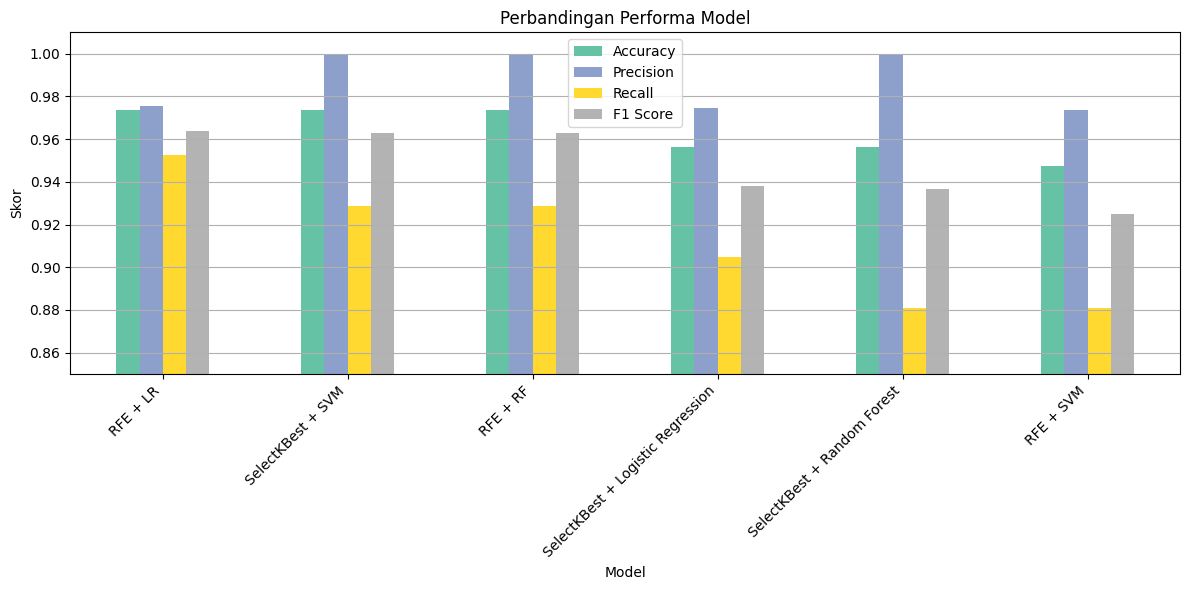

In [27]:
# Urutkan berdasarkan F1 Score dan reset index
results_sorted = results_df.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)

# Plot
results_sorted.plot(
    x='Model',
    y=['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    kind='bar',
    figsize=(12, 6),
    colormap='Set2'
)

plt.title('Perbandingan Performa Model')
plt.ylabel('Skor')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.85, 1.01)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Insight Evaluasi Model:**

1. Berdasarkan barplot hasil evaluasi enam kombinasi model dan metode seleksi fitur, model RFE + Logistic Regression memberikan performa paling seimbang dengan F1 Score tertinggi (0.9639), diikuti sangat dekat oleh SelectKBest + SVM dan RFE + Random Forest yang juga memiliki akurasi dan precision 100%, namun sedikit lebih rendah di aspek recall.

2. Metode seleksi fitur RFE (Recursive Feature Elimination) terbukti lebih konsisten memberikan performa tinggi dibandingkan SelectKBest. Di sisi lain, algoritma SVM dan Random Forest mampu mencapai precision sempurna, namun trade-off-nya adalah recall sedikit lebih rendah (mungkin cenderung overfitting pada data benign).

3. Secara keseluruhan, model RFE + Logistic Regression dapat direkomendasikan karena memberikan keseimbangan terbaik antara semua metrik evaluasi.

### Metrik evaluasi ROC-AUC dan PR-AUC

**insight:**
- Menghitung ROC-AUC dan PR-AUC untuk mengevaluasi kemampuan model membedakan kelas.

In [28]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

model_list = [
    ("RFE + LR", model_rfe_lr, X_test_rfe),
    ("RFE + RF", model_rfe_rf, X_test_rfe_rf),
    ("RFE + SVM", model_rfe_svm, X_test_rfe_svm),
    ("SelectKBest + Logistic Regression", model_lr, X_test_skb),
    ("SelectKBest + Random Forest", model_rf, X_test_skb),
    ("SelectKBest + SVM", model_svm, X_test_skb)
]

for name, model, X_test in model_list:
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        # Untuk SVM jika tidak ada predict_proba
        y_prob = model.decision_function(X_test)

    roc_auc = roc_auc_score(y_test, y_prob)
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)

    print(f"{name}")
    print(f"  ROC-AUC : {roc_auc:.4f}")
    print(f"  PR-AUC  : {pr_auc:.4f}")
    print("-" * 40)

RFE + LR
  ROC-AUC : 0.9974
  PR-AUC  : 0.9957
----------------------------------------
RFE + RF
  ROC-AUC : 0.9945
  PR-AUC  : 0.9916
----------------------------------------
RFE + SVM
  ROC-AUC : 0.9944
  PR-AUC  : 0.9913
----------------------------------------
SelectKBest + Logistic Regression
  ROC-AUC : 0.9974
  PR-AUC  : 0.9956
----------------------------------------
SelectKBest + Random Forest
  ROC-AUC : 0.9894
  PR-AUC  : 0.9848
----------------------------------------
SelectKBest + SVM
  ROC-AUC : 0.9987
  PR-AUC  : 0.9978
----------------------------------------


**Insight Metrik Evaluasi ROC-AUC dan PR-AUC :**
1. Model terbaik secara ROC-AUC dan PR-AUC adalah SelectKBest + SVM

- ROC-AUC: 0.9987

- PR-AUC : 0.9978
2. Model ini menunjukkan kemampuan terbaik dalam membedakan antara kelas dan tetap sangat baik dalam situasi data tidak seimbang.

3. Model lain yang juga sangat kuat:

- RFE + LR (ROC-AUC: 0.9974, PR-AUC: 0.9957)

- SelectKBest + Logistic Regression (ROC-AUC: 0.9974, PR-AUC: 0.9956)
Kedua model ini sangat kompetitif, hanya sedikit di bawah SVM.

- Model dengan performa paling rendah dalam metrik ini:

- SelectKBest + Random Forest (ROC-AUC: 0.9894, PR-AUC: 0.9848)
Meski tetap tinggi, performanya sedikit di bawah yang lain.